In [1]:
import sys
sys.path.append('../')

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
db_file = "../db.sqlite3"

In [4]:
con = sqlite3.connect(db_file)

In [5]:
columns = [
    "id",
    "date_of_collection",
    "sample_id",
    "site_id",
]

stool_df = pd.read_sql_query(
    "SELECT {} FROM sample_stool;".format(",".join(columns)), con
)

In [6]:
stool_df

,id,date_of_collection,sample_id,site_id
0,1,2023-02-23,S_MP-janakpur_20230223_P75FD,128
1,2,2023-03-05,S_MP-janakpur_20230305_2R4PJ,128
2,4,2023-04-06,S_SP-saphebagar_20230406_BWCCY,250
3,5,2023-04-07,S_SP-saphebagar_20230407_4DUIJ,250
4,6,2023-04-07,S_SP-saphebagar_20230407_DTUSS,250
5,7,2023-04-07,S_SP-budhiganga_20230407_ME15N,55
6,8,2023-04-07,S_SP-saphebagar_20230407_1ILB7,250
7,9,2023-04-07,S_SP-bannigadi-jayagad_20230407_ZP6TK,705
8,10,2023-04-07,S_SP-ramaroshan_20230407_0XW2X,700
9,11,2023-04-09,S_SP-budhiganga_20230409_LKM0V,55


In [7]:
# site_id is id for municipality, which contains district_id and district contains province_id
stool_df["province"] = stool_df["site_id"].apply(
    lambda x: pd.read_sql_query(
        "SELECT name from address_province WHERE id in (SELECT province_id from address_district WHERE id in (SELECT district_id from address_municipality WHERE id = {}));".format(
            x
        ),
        con,
    ).iloc[0]["name"]
    )

In [8]:
stool_df

,id,date_of_collection,sample_id,site_id,province
0,1,2023-02-23,S_MP-janakpur_20230223_P75FD,128,Madesh Pradesh
1,2,2023-03-05,S_MP-janakpur_20230305_2R4PJ,128,Madesh Pradesh
2,4,2023-04-06,S_SP-saphebagar_20230406_BWCCY,250,Sudurpashchim Pradesh
3,5,2023-04-07,S_SP-saphebagar_20230407_4DUIJ,250,Sudurpashchim Pradesh
4,6,2023-04-07,S_SP-saphebagar_20230407_DTUSS,250,Sudurpashchim Pradesh
5,7,2023-04-07,S_SP-budhiganga_20230407_ME15N,55,Sudurpashchim Pradesh
6,8,2023-04-07,S_SP-saphebagar_20230407_1ILB7,250,Sudurpashchim Pradesh
7,9,2023-04-07,S_SP-bannigadi-jayagad_20230407_ZP6TK,705,Sudurpashchim Pradesh
8,10,2023-04-07,S_SP-ramaroshan_20230407_0XW2X,700,Sudurpashchim Pradesh
9,11,2023-04-09,S_SP-budhiganga_20230409_LKM0V,55,Sudurpashchim Pradesh


In [9]:
# get the number of stool samples collected per province
stats_df = stool_df.groupby("province").count()["id"]


In [10]:
stats_df

province
Madesh Pradesh           11
Sudurpashchim Pradesh    18
Name: id, dtype: int64

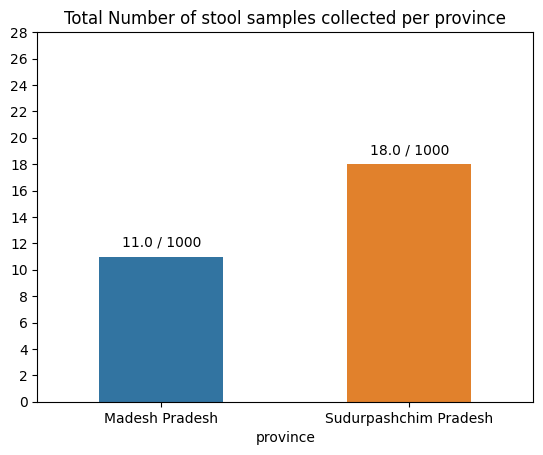

In [84]:
target_count = 1000
sns.set_palette(sns.color_palette("tab10"))
# bar plot
stool_bar = sns.barplot(x=stats_df.index, y=stats_df.values)

# decrease bar width
for patch in stool_bar.patches: 
    current_width = patch.get_width()
    patch.set_width(0.5)
    diff = current_width - patch.get_width()
    patch.set_x(patch.get_x() + diff * .5)

# set title
plt.title("Total Number of stool samples collected per province")
# set x and y labels

# yticks and xticks
plt.xticks(rotation=0)
plt.yticks(range(0, 30, 2))

# show count on top of each bar with count out of target, int count no float

for p in stool_bar.patches:
    stool_bar.annotate(
        str(p.get_height()) + " / " + str(target_count),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points",
    )

Text(0, 1003, '1000')

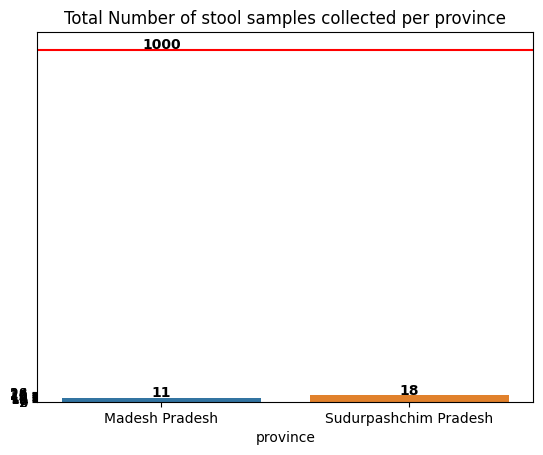

In [54]:
target_sample_number = 1000



In [12]:
image_columns = [
    "image_id",
    "image_type",
    "created_at",
    "slide_id"
]

In [13]:
stool_image_df = pd.read_sql_query(
    "SELECT {} FROM sample_slideimage where slide_id in ( \
        SELECT id from sample_slide where stool_sample_id is not null \
    );".format(",".join(image_columns)), con
)

In [14]:
stool_image_df

,image_id,image_type,created_at,slide_id
0,S_MP-janakpur_20230223_P75FD_S1_I1_S,S,2023-04-01 10:39:59.301468,272
1,S_MP-janakpur_20230223_P75FD_S1_I1_B,B,2023-02-23 12:12:39.475363,272
2,S_MP-janakpur_20230223_P75FD_S1_I2_S,S,2023-04-01 10:39:59.316240,272
3,S_MP-janakpur_20230223_P75FD_S1_I2_B,B,2023-02-23 12:12:39.482886,272
4,S_MP-janakpur_20230223_P75FD_S1_I3_S,S,2023-04-01 10:39:59.326441,272
...,...,...,...,...
2605,S_MP-janakpur_20230427_JCNQ1_S3_I13_B,B,2023-04-28 05:16:43.597581,472
2606,S_MP-janakpur_20230427_JCNQ1_S3_I14_S,S,2023-04-28 05:23:34.610413,472
2607,S_MP-janakpur_20230427_JCNQ1_S3_I14_B,B,2023-04-28 05:16:43.604961,472
2608,S_MP-janakpur_20230427_JCNQ1_S3_I15_S,S,2023-04-28 05:23:34.621350,472


In [17]:
stool_image_df["province"] = stool_image_df["slide_id"].apply(
    lambda x: pd.read_sql_query(
        "SELECT name from address_province WHERE id in (SELECT province_id from address_district WHERE id in (SELECT district_id from address_municipality WHERE id in (SELECT site_id from sample_stool WHERE id in (SELECT stool_sample_id from sample_slide WHERE id = {}))));".format(
            x
        ),
        con,
    ).iloc[0]["name"]
)

In [25]:
# group by province, and sample type
stool_image_stats_df = stool_image_df.groupby(["province", "image_type"]).count()["image_id"]

In [27]:
# rename B to Brightfield, and S to Smartphone
stool_image_stats_df = stool_image_stats_df.rename(index={"B": "Brightfield", "S": "Smartphone"})

In [44]:
stool_image_stats_df

province               image_type 
Madesh Pradesh         Brightfield    495
                       Smartphone     495
Sudurpashchim Pradesh  Brightfield    810
                       Smartphone     810
Name: image_id, dtype: int64

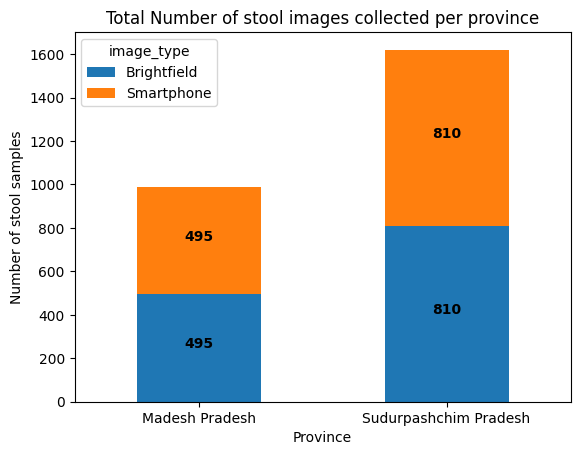

In [51]:
# barplot for stool samples by province and image type in same figure
stool_image_bar = stool_image_stats_df.unstack().plot(kind="bar", stacked=True)

# set title
plt.title("Total Number of stool images collected per province")
# set x and y labels
plt.xlabel("Province")
plt.ylabel("Number of stool samples")

# yticks and xticks
plt.xticks(rotation=0)

# show count on top of each bar
for i, v in enumerate(stool_image_stats_df.unstack().values):
    plt.text(
        i,
        v[0] / 2,
        str(v[0]),
        horizontalalignment="center",
        color="black",
        fontweight="bold",
    )
    plt.text(
        i,
        v[0] + v[1] / 2,
        str(v[1]),
        horizontalalignment="center",
        color="black",
        fontweight="bold",
    )


In [69]:
last_week = pd.Timestamp.today() - pd.Timedelta(days=7)

In [74]:
# get str date
last_week_str = last_week.strftime("%Y-%m-%d")
last_week_str

'2023-06-02'

In [76]:
# number of sample images created in the last one week
images_in_last_week = stool_image_df[stool_image_df["created_at"] > last_week_str].groupby(["province", "image_type"]).count()["image_id"]

In [77]:
images_in_last_week

Series([], Name: image_id, dtype: int64)

In [78]:
# samples in last week
samples_in_last_week = stool_df[stool_df["date_of_collection"] > last_week_str].groupby("province").count()["id"]

In [79]:
samples_in_last_week

Series([], Name: id, dtype: int64)